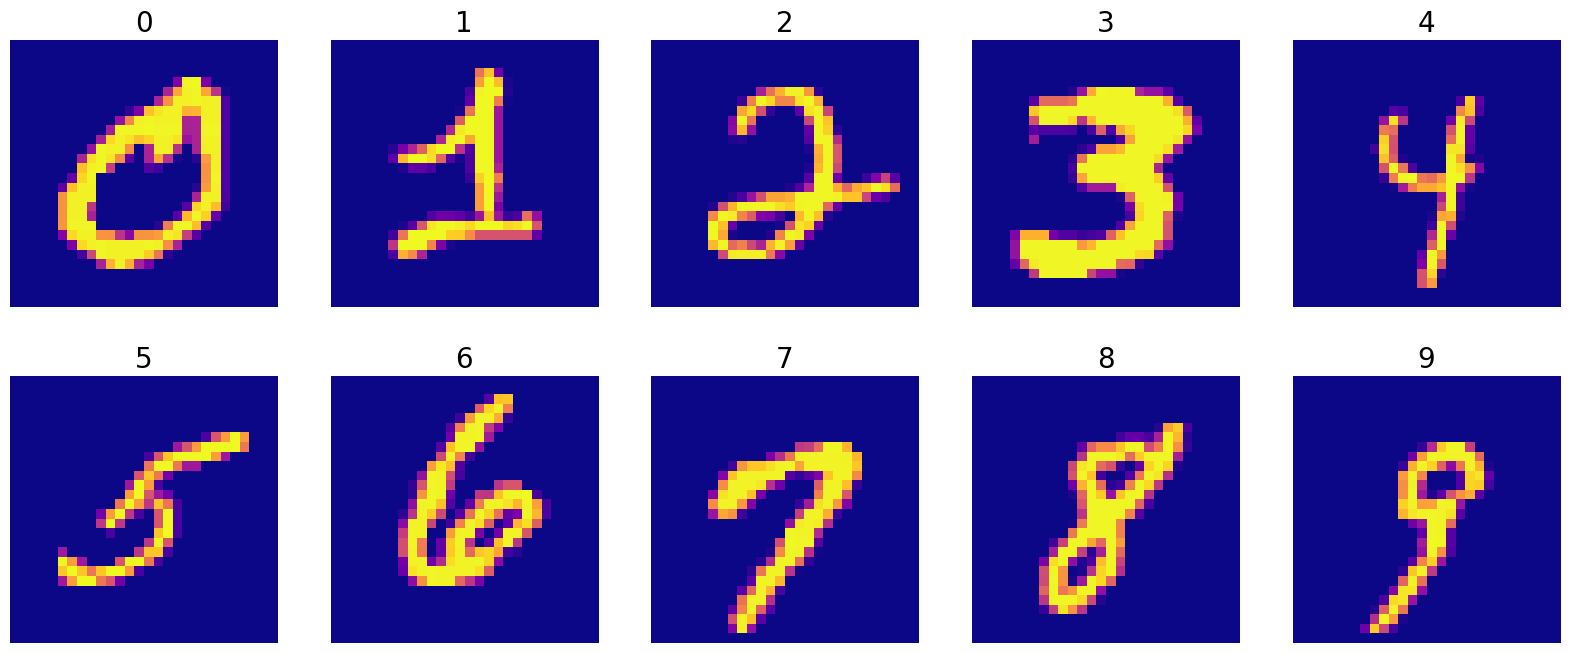

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import time as time


def plot_digits(
    images,
    n_rows=2,
    n_cols=5,
    fig_shape=(20, 8),
    indexes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    img_shape=(28, 28),
    labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
):

    fig, axs = plt.subplots(n_rows, n_cols, figsize=fig_shape)

    ind = np.array(indexes).reshape(n_rows, n_cols)
    if labels:
        plt_labels = np.array(labels).reshape(n_rows, n_cols)

    for i in range(0, n_rows):
        for j in range(0, n_cols):
            if labels:
                axs[i, j].set_title(plt_labels[i, j], fontsize=20)

            axs[i, j].imshow((images[ind[i, j]].reshape(img_shape)), cmap="plasma")
            axs[i, j].axis("off")


mnist = fetch_openml("mnist_784")  # Baixar os dados

X, y = mnist.data.to_numpy(), mnist.target.to_numpy()
X = X / 255  # Colocar as features em [0, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot dos digÃ­tos
plot_digits(X, n_rows=2, n_cols=5, indexes=[21, 24, 16, 27, 26, 35, 13, 15, 17, 19])

In [5]:
# A)
import time as time
nb = BernoulliNB(force_alpha=True)  # Naive Bayes com features bernoulli
lda = LinearDiscriminantAnalysis()  # LDA
qda = QuadraticDiscriminantAnalysis()  # QDA
lr = LogisticRegression(random_state=42)  # RegressÃ£o LogÃ­stica
knn = KNeighborsClassifier(n_neighbors=6)  # kNN com k = 6
svc = svm.SVC(gamma="scale", class_weight="balanced", C=100)  # SVM
rf = RandomForestClassifier(max_depth=30, random_state=0, n_estimators=100)  # Random forest
nn = MLPClassifier(random_state=42, hidden_layer_sizes=[100], max_iter=300)  # Rede neural

In [6]:
def get_time_to_train(model, X_train, y_train):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    print(f"Tempo para treinar o modelo {model}: {end - start}")
    return model

def get_time_to_predict(model, X_test, y_test):
    start = time.time()
    y_pred = model.predict(X_test)
    end = time.time()
    print(f"Tempo para prever com o modelo {model}: {end - start}")
    print(f"Acruacia do modelo {model}: {np.sum(y_pred == y_test)/len(y_test)}")
    return y_pred

In [7]:
nb = get_time_to_train(nb, X_train, y_train)
lda = get_time_to_train(lda, X_train, y_train)
qda = get_time_to_train(qda, X_train, y_train)
lr = get_time_to_train(lr, X_train, y_train)
knn = get_time_to_train(knn, X_train, y_train)
svc = get_time_to_train(svc, X_train, y_train)
rf = get_time_to_train(rf, X_train, y_train)
nn = get_time_to_train(nn, X_train, y_train)

Tempo para treinar o modelo BernoulliNB(): 0.8559560775756836
Tempo para treinar o modelo LinearDiscriminantAnalysis(): 29.260023832321167


c:\Users\bielv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\bielv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\bielv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\bielv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is 

Tempo para treinar o modelo QuadraticDiscriminantAnalysis(): 14.72248125076294


c:\Users\bielv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Tempo para treinar o modelo LogisticRegression(random_state=42): 11.886216640472412
Tempo para treinar o modelo KNeighborsClassifier(n_neighbors=6): 0.126478910446167
Tempo para treinar o modelo SVC(C=100, class_weight='balanced'): 212.8464126586914
Tempo para treinar o modelo RandomForestClassifier(max_depth=30, random_state=0): 54.42084717750549
Tempo para treinar o modelo MLPClassifier(hidden_layer_sizes=[100], max_iter=300, random_state=42): 95.84694528579712


In [8]:
y_pred_nb = get_time_to_predict(nb, X_test, y_test)
y_pred_lda = get_time_to_predict(lda, X_test, y_test)
y_pred_qda = get_time_to_predict(qda, X_test, y_test)
y_pred_lr = get_time_to_predict(lr, X_test, y_test)
y_pred_knn = get_time_to_predict(knn, X_test, y_test)
y_pred_svc = get_time_to_predict(svc, X_test, y_test)
y_pred_rf = get_time_to_predict(rf, X_test, y_test)
y_pred_nn = get_time_to_predict(nn, X_test, y_test)

Tempo para prever com o modelo BernoulliNB(): 0.14716768264770508
Acruacia do modelo BernoulliNB(): 0.8348571428571429
Tempo para prever com o modelo LinearDiscriminantAnalysis(): 0.039583683013916016
Acruacia do modelo LinearDiscriminantAnalysis(): 0.8677142857142857
Tempo para prever com o modelo QuadraticDiscriminantAnalysis(): 2.6857593059539795
Acruacia do modelo QuadraticDiscriminantAnalysis(): 0.5312857142857143
Tempo para prever com o modelo LogisticRegression(random_state=42): 0.03498053550720215
Acruacia do modelo LogisticRegression(random_state=42): 0.9202857142857143
Tempo para prever com o modelo KNeighborsClassifier(n_neighbors=6): 11.559824228286743
Acruacia do modelo KNeighborsClassifier(n_neighbors=6): 0.969
Tempo para prever com o modelo SVC(C=100, class_weight='balanced'): 123.24246501922607
Acruacia do modelo SVC(C=100, class_weight='balanced'): 0.9824285714285714
Tempo para prever com o modelo RandomForestClassifier(max_depth=30, random_state=0): 0.8036403656005859

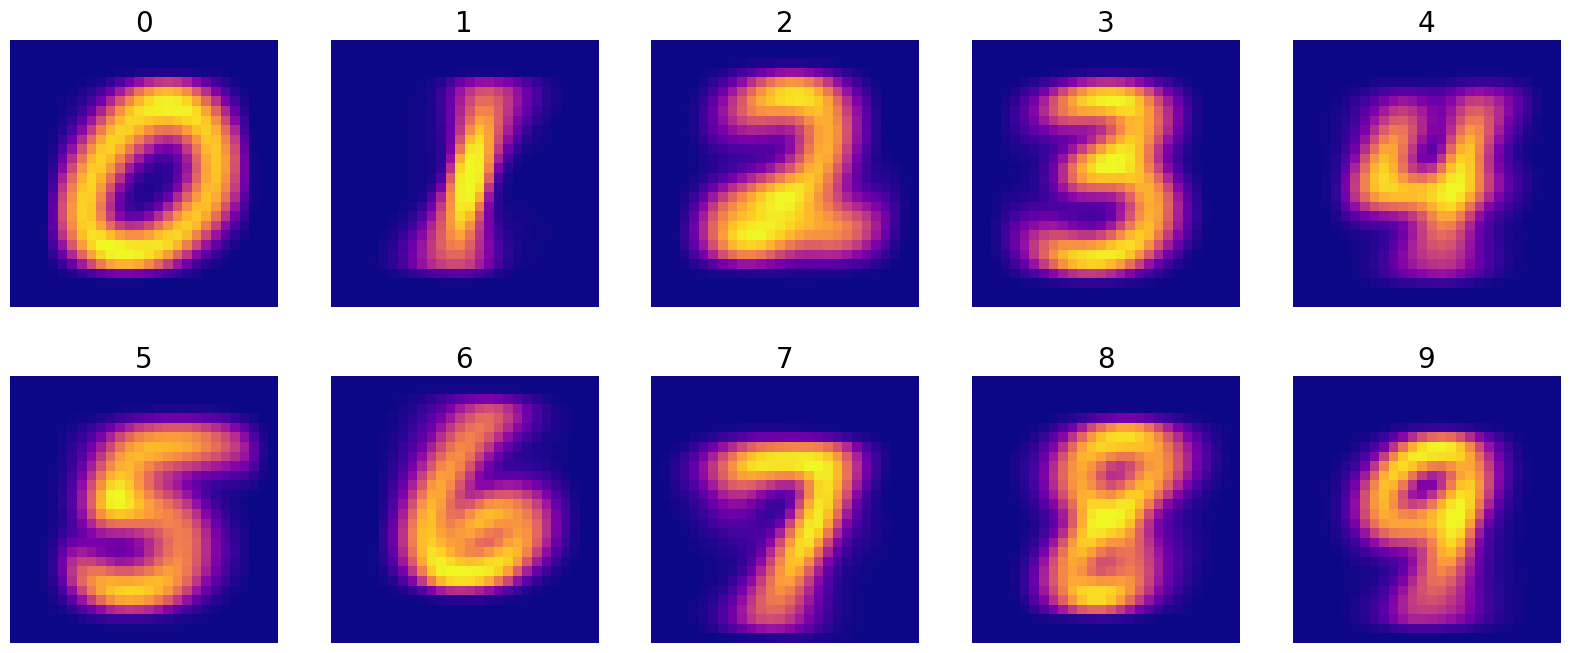

In [ ]:
# QuestÃ£o 2b(i)

nb_params = {}
for i in range(0, 10):
    nb_params[i] = np.exp(nb.feature_log_prob_[i]) # Empirical log probability of features given a class, P(x_i|y).

plot_digits(nb_params)

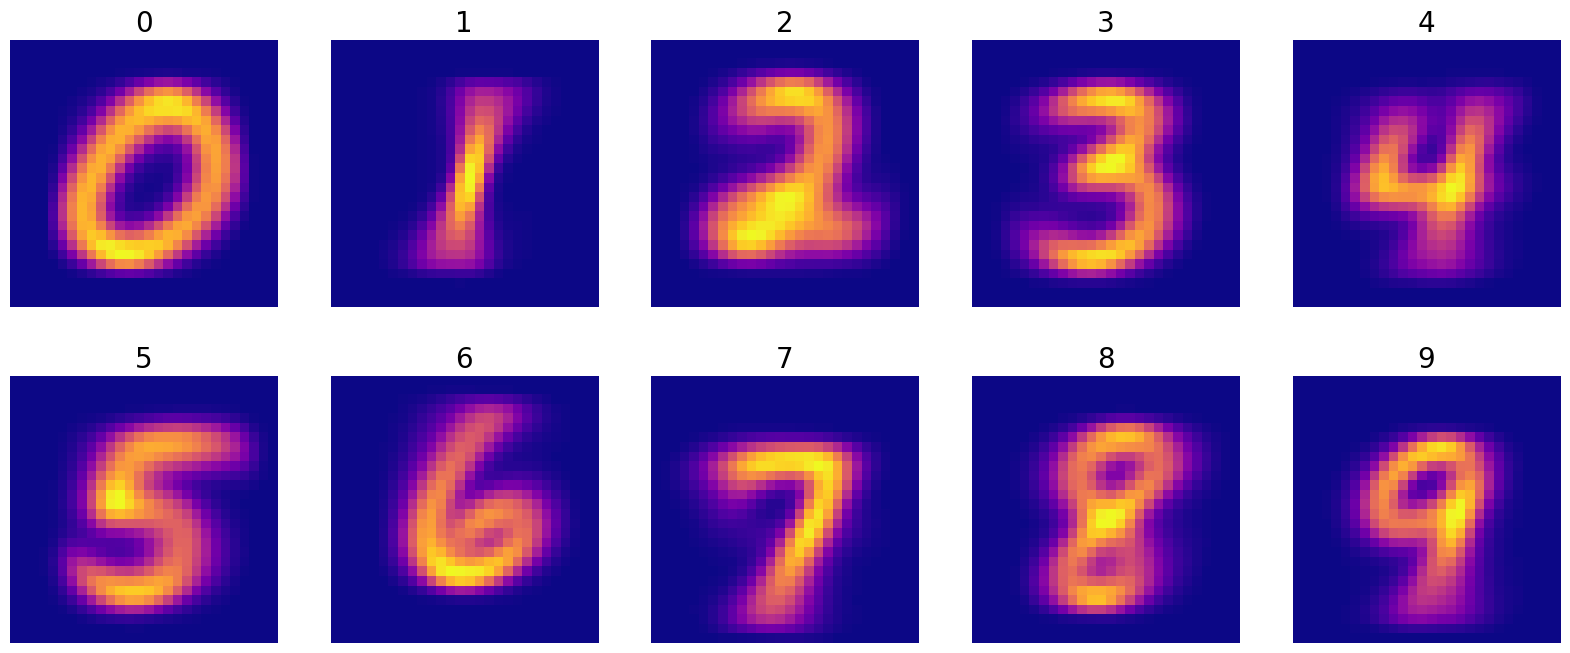

In [ ]:
# QuestÃ£o 2b(ii)

lda_params = {}
for i in range(0, 10):
    # media de cada pixel para cada classe
    lda_params[i] = lda.means_[i] # Class-wise means.

plot_digits(lda_params)

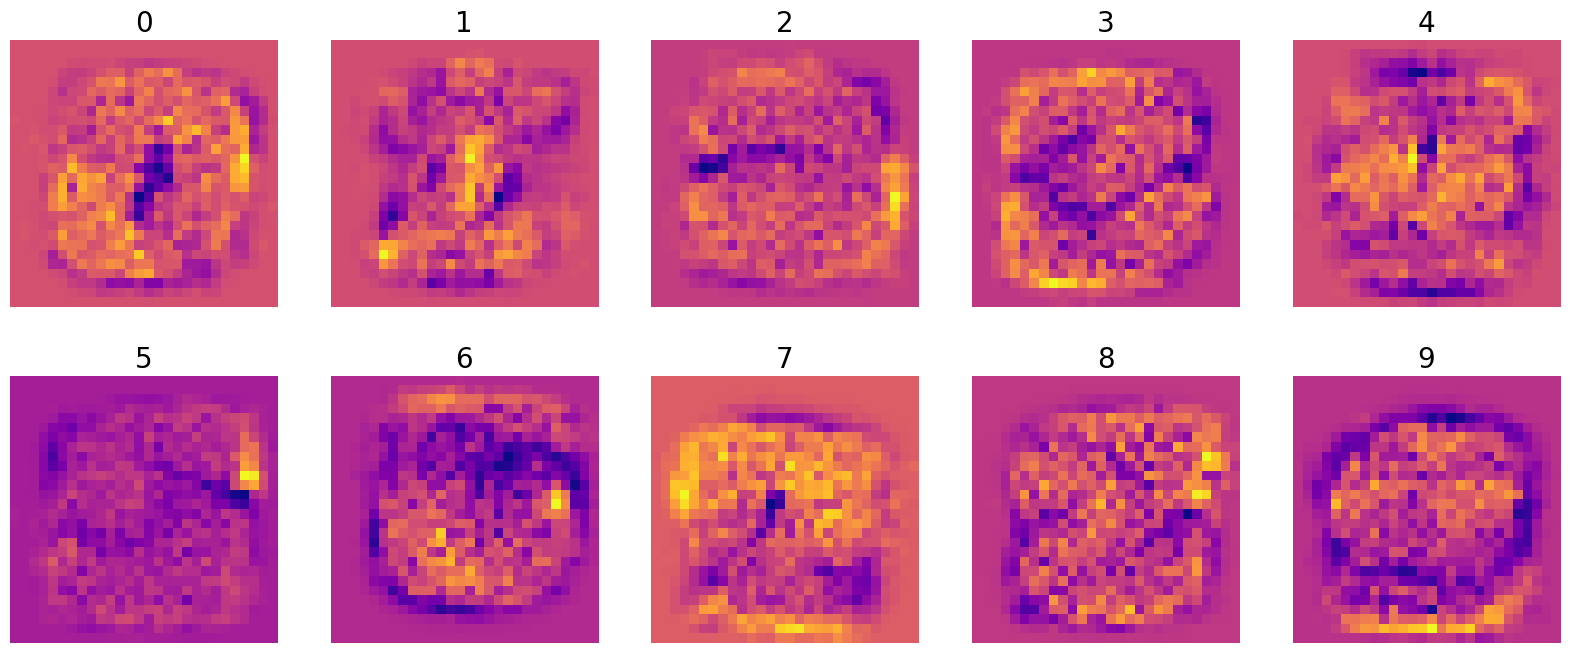

In [ ]:
# QuestÃ£o 2b(iii)

log_reg_params = {}
for i in range(0, 10):
    # Coeficiente de cada pixel para cada classe (ha diferentes coeficientes por classe por se tratar de um problema multiclasse).
    # De certa forma, esse coeficiente tras uma nocao de importancia do pixel para determinar se uma amostra pertence a uma certa classe.

    log_reg_params[i] = lr.coef_[i] # Coefficient of the features in the decision function

plot_digits(log_reg_params)

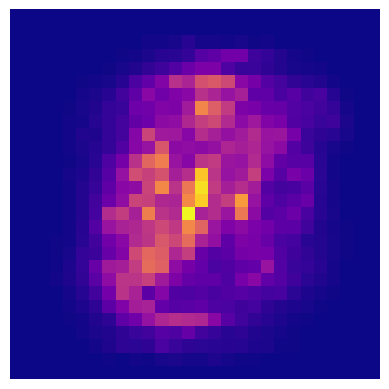

In [ ]:
# QuestÃ£o 2b(iv)

rf_params = rf.feature_importances_.reshape(28, 28)
# O valor da importancia da feature. O heatmap, portanto, indica quais features sao mais importantes para determinar a classe de um digito.
# Ou seja, aquelas que possuem maior efeito na construcao da arvore de decisao.

# The impurity-based feature importances.
# The higher, the more important the feature.
# The importance of a feature is computed as the (normalized)
# total reduction of the criterion brought by that feature.  It is also
# known as the Gini importance.

plt.axis("off")
plt.imshow(rf_params, cmap="plasma")

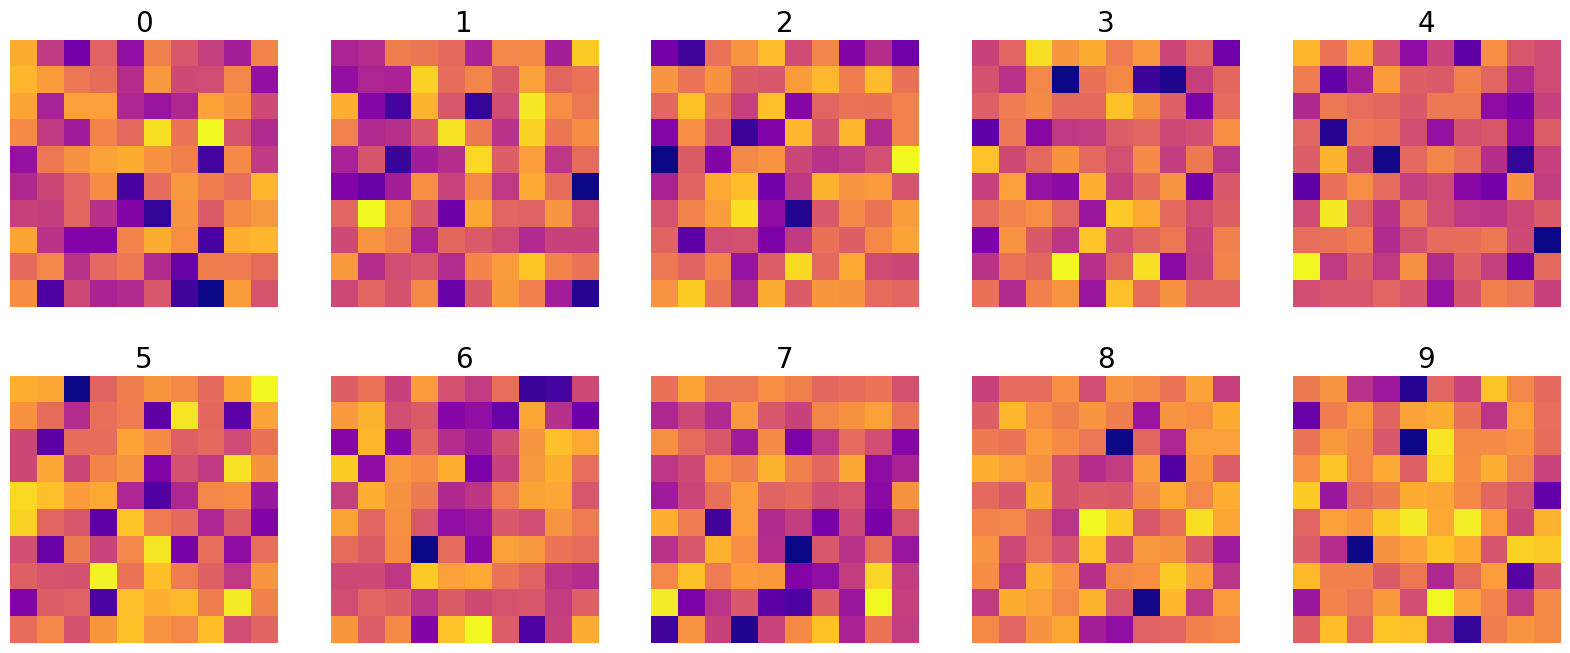

In [45]:
# QuestÃ£o 2b(v)
##??

nn_params_1 = {}
for i in range(0, 100):
    # Matriz de pesos para cada hidden layer da rede neural
    # De certa forma, essa matriz indica a importancia de cada pixel para cada camada da rede neural atraves da matriz de pesos
    nn_params_1[i] = nn.coefs_[0][:, i]

indexes = [i for i in range(0, 100)]

plot_digits(nn_params_1, n_rows=10, n_cols=10, fig_shape=(100, 100), indexes=indexes, img_shape=(28, 28), labels=None)


nn_params_2 = {}
for i in range(0, 10):
    # Matriz de pesos para cada output layer da rede neural
    nn_params_2[i] = nn.coefs_[1][:, i]

plot_digits(nn_params_2, n_rows=2, n_cols=5, fig_shape=(20, 8), img_shape=(10, 10))

In [ ]:
# 2C
# Matriz de confusão para NB

confusion_matrix(y_test, y_pred_nb)

# linhas: valor real
# colunas: valor predito

# Classe 0: erro mais comum é prever 5
# Classe 1: erro mais coumum é prever 5
# Classe 2: erro mais comum é prever 6
# Classe 3: erro mais comum é prever 2
# Classe 4: erro mais comum é prever 9
# Classe 5: erro mais comum é prever 3
# Classe 6: erro mais comum é prever 1
# Classe 7: erro mais comum é prever 9
# Classe 8: erro mais comum é prever 3
# Classe 9: erro mais comum é prever 4

array([[1198,    1,    6,   13,    3,   63,   31,    1,   25,    2],
       [   0, 1540,    8,    8,    1,   18,    3,    1,   17,    4],
       [  17,   25, 1133,   39,   29,    7,   57,   12,   55,    6],
       [   8,   36,   67, 1148,    3,   31,   13,   22,   60,   45],
       [   4,    7,    8,    0, 1042,    8,   22,    6,   26,  172],
       [  31,   22,    9,  190,   38,  906,   25,    7,   17,   28],
       [  15,   42,   32,    2,   19,   33, 1250,    0,    3,    0],
       [   8,   28,   11,    5,   34,    3,    0, 1274,   30,  110],
       [  17,   55,   23,  103,   14,   45,    6,    6, 1033,   55],
       [  11,   26,    8,   11,  101,    7,    0,   55,   37, 1164]],
      dtype=int64)